In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#Import .csv file
df=pd.read_csv('AB_NYC_2019_clean.csv')
df.head()

,Unnamed: 0,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [3]:
#Create dataframe with needed columns
min_df=pd.DataFrame(df[['minimum_nights','number_of_reviews', 'id']])
min_df.head()

,minimum_nights,number_of_reviews,id
0,1,9,2539
1,1,45,2595
2,3,0,3647
3,1,270,3831
4,10,9,5022


In [4]:
#Create bounds
lowerq = min_df['minimum_nights'].quantile([.25,.5,.75])[0.25]
upperq = min_df['minimum_nights'].quantile([.25,.5,.75])[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
min_df = min_df.loc[(min_df['minimum_nights'] > 0) & (min_df['minimum_nights'] < 200) ]
#min_df

The correlation between minimum nights and reviews in Airbnb is -0.12


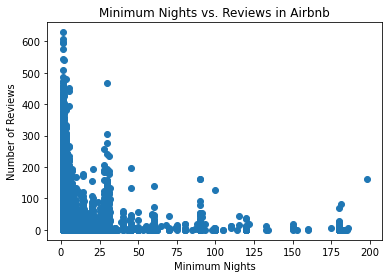

<Figure size 864x576 with 0 Axes>

In [5]:
#Identify x and y values
x_data= min_df["minimum_nights"]
y_data= min_df ["number_of_reviews"]

# Calculate the correlation for minimum nights and number of reviews for Airbnb
correlation = st.pearsonr(x_data, y_data)
print(f'The correlation between minimum nights and reviews in Airbnb is {round(correlation[0],2)}')

#Create a scatter plot
marker_size=15
plt.scatter(x_data,y_data)
plt.plot()
plt.title('Minimum Nights vs. Reviews in Airbnb')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Reviews')
plt.figure(figsize=(12,8))
plt.savefig("plot_airbnb_stay.png")
plt.show()

In [6]:
#Identify each review as an individual count and create a df
df.loc[df.index.repeat(df["number_of_reviews"])]
flat_df=pd.DataFrame(df.loc[df.index.repeat(df["number_of_reviews"])])
flat_df

,Unnamed: 0,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
0,0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
0,0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
0,0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
0,0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48790,48790,36427429,257683179,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,1.00,6,339
48799,48799,36438336,211644523,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,1.00,1,87
48805,48805,36442252,273841667,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2.00,1,40
48805,48805,36442252,273841667,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2.00,1,40


The correlation between minimum nights and reviews in Airbnb is -0.12


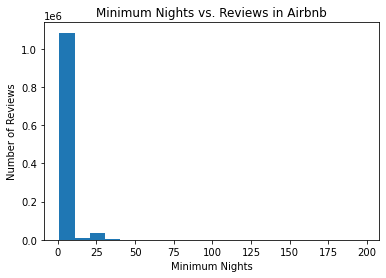

In [7]:
#Create bounds for new df
min_flat_df = flat_df.loc[(flat_df["minimum_nights"] > 0) & (flat_df["minimum_nights"] < 200)]
#min_flat_df

#Identify x value for histogram
x_data= min_flat_df["minimum_nights"]
y_data= min_flat_df["number_of_reviews"]

# Calculate the correlation for minimum nights and number of reviews for Airbnb
correlation = st.pearsonr(x_data, y_data)
print(f'The correlation between minimum nights and reviews in Airbnb is {round(correlation[0],2)}')

#Create histogram with new data
plt.hist(x_data, bins=20)
plt.title('Minimum Nights vs. Reviews in Airbnb')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Reviews')
plt.savefig("airbnb_hist.png")
plt.show()

The correlation between minimum nights and reviews in Airbnb is -0.22


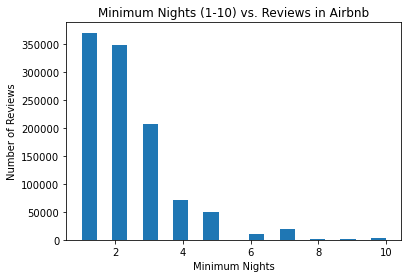

In [8]:
#Create bounds for new df
min_flat_df = flat_df.loc[(flat_df["minimum_nights"] > 0) & (flat_df["minimum_nights"] < upper_bound)]
#min_flat_df

#Identify x value for histogram
x_data= min_flat_df["minimum_nights"]
y_data= min_flat_df["number_of_reviews"]

# Calculate the correlation for minimum nights and number of reviews for Airbnb
correlation = st.pearsonr(x_data, y_data)
print(f'The correlation between minimum nights and reviews in Airbnb is {round(correlation[0],2)}')

#Create histogram with new data
plt.hist(x_data, bins=20)
plt.title('Minimum Nights (1-10) vs. Reviews in Airbnb')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Reviews')
plt.savefig("one_ten_airbnb_hist.png")
plt.show()